<a href="https://colab.research.google.com/github/w-enderson/analysis-of-mental-health/blob/main/Mental_heath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando dados

In [379]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)


In [380]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mental-health-in-tech-survey


In [381]:
import pandas as pd

df = pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')

Análise Exploratória de Dados

In [382]:
df.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [383]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [384]:
df.describe()

,Age
count,1259.00
mean,79428148.31
std,2818299442.98
min,-1726.00
25%,27.00
50%,31.00
75%,36.00
max,99999999999.00


In [385]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [386]:
df.duplicated().sum()

np.int64(0)

Tratando outliers da variável preditora "AGE"

In [387]:
df[(df['Age']>100) | (df['Age']<0)]["Age"]

,Age
143,-29
364,329
390,99999999999
715,-1726
1127,-1


In [388]:
df[(df['Age']>100) | (df['Age']<0)]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


In [389]:
df_cleaned = df.drop(df[(df['Age']>100) | (df['Age']<0)].index) # eliminando outliers
df_cleaned = df_cleaned.drop(columns=['Timestamp', 'comments', 'state']) # eliminando variáveis desnecessárias/com muitos campos nulos

In [390]:
df_cleaned.describe()

,Age
count,1254.00
mean,32.02
std,7.38
min,5.00
25%,27.00
50%,31.00
75%,36.00
max,72.00


Tratando classes da variável nominal GENDER (muitos valores diferentes, mas com mesmo significado)



In [391]:
df_cleaned["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [392]:
# Padronização
df_cleaned['Gender'] = df_cleaned['Gender'].str.lower().str.strip()

# Dicionários de mapeamento
map_m = [
    'male', 'm', 'male-ish', 'maile', 'mal', 'male (cis)', 'make', 'cis male',
    'man', 'cis man', 'msle', 'mail', 'malr', 'cisdude', 'cishet male',
    'guy (-ish) ^_^', 'male ', 'ostensibly male, unsure what that really means'
]

map_f = [
    'female', 'f', 'cis female', 'woman', 'femake', 'female ', 'female (cis)',
    'femail', 'cis-female/femme'
]

def categoriza_genero(g):
    if g in map_m:
        return 'm'
    elif g in map_f:
        return 'f'
    else:
        return 'other'

# trocando classes com base no mapeamento feito
df_cleaned['Gender'] = df_cleaned['Gender'].apply(categoriza_genero)


In [393]:
df_cleaned["Gender"].value_counts()

,count
Gender,
m,990
f,247
other,17


In [394]:
df_cleaned['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Bahamas, The', 'Greece', 'Moldova',
       'Georgia', 'China', 'Czech Republic', 'Philippines'], dtype=object)

In [395]:
df_cleaned

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,f,United States,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,m,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,m,Canada,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,m,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,m,United States,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,m,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,m,United States,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,m,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


A variável "work_interfere" possuia muitos campos nulos, optei por preencher tais campos com "unknown", mas não fiz um teste "A/B" pra comparar se era melhor remover ou preencher;


In [396]:
df_cleaned['work_interfere'] = df_cleaned['work_interfere'].fillna('Unknown')


In [397]:
print(df_cleaned.isnull().sum())
df_cleaned = df_cleaned.dropna() # removendo registros nulos

Age                           0
Gender                        0
Country                       0
self_employed                18
family_history                0
treatment                     0
work_interfere                0
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64


In [398]:
df_cleaned.head(2)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,m,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,Yes,Not sure,Yes,Don't know,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,m,France,Yes,Yes,No,Unknown,6-25,Yes,Yes,No,No,Yes,No,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No


In [399]:
df_cleaned["leave"].value_counts(dropna=False)

,count
leave,
Don't know,552
Somewhat easy,263
Very easy,204
Somewhat difficult,121
Very difficult,96


Haviam muitas classes raras na variável "COUNTRY", não eram tão representativas, então optei por substituir tais classes por "other" (novamente, não fiz testes para verificar qual alternativa era melhor)

In [400]:
value_counts = df_cleaned['Country'].value_counts()
rare_countries = value_counts[value_counts < 5].index
df_cleaned['Country'] = df_cleaned['Country'].replace(rare_countries, 'Other')


<ipython-input-400-14b8e4fd0247>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country'] = df_cleaned['Country'].replace(rare_countries, 'Other')


aplicando One Hot Encoding nas variáveis qualitativas nominais


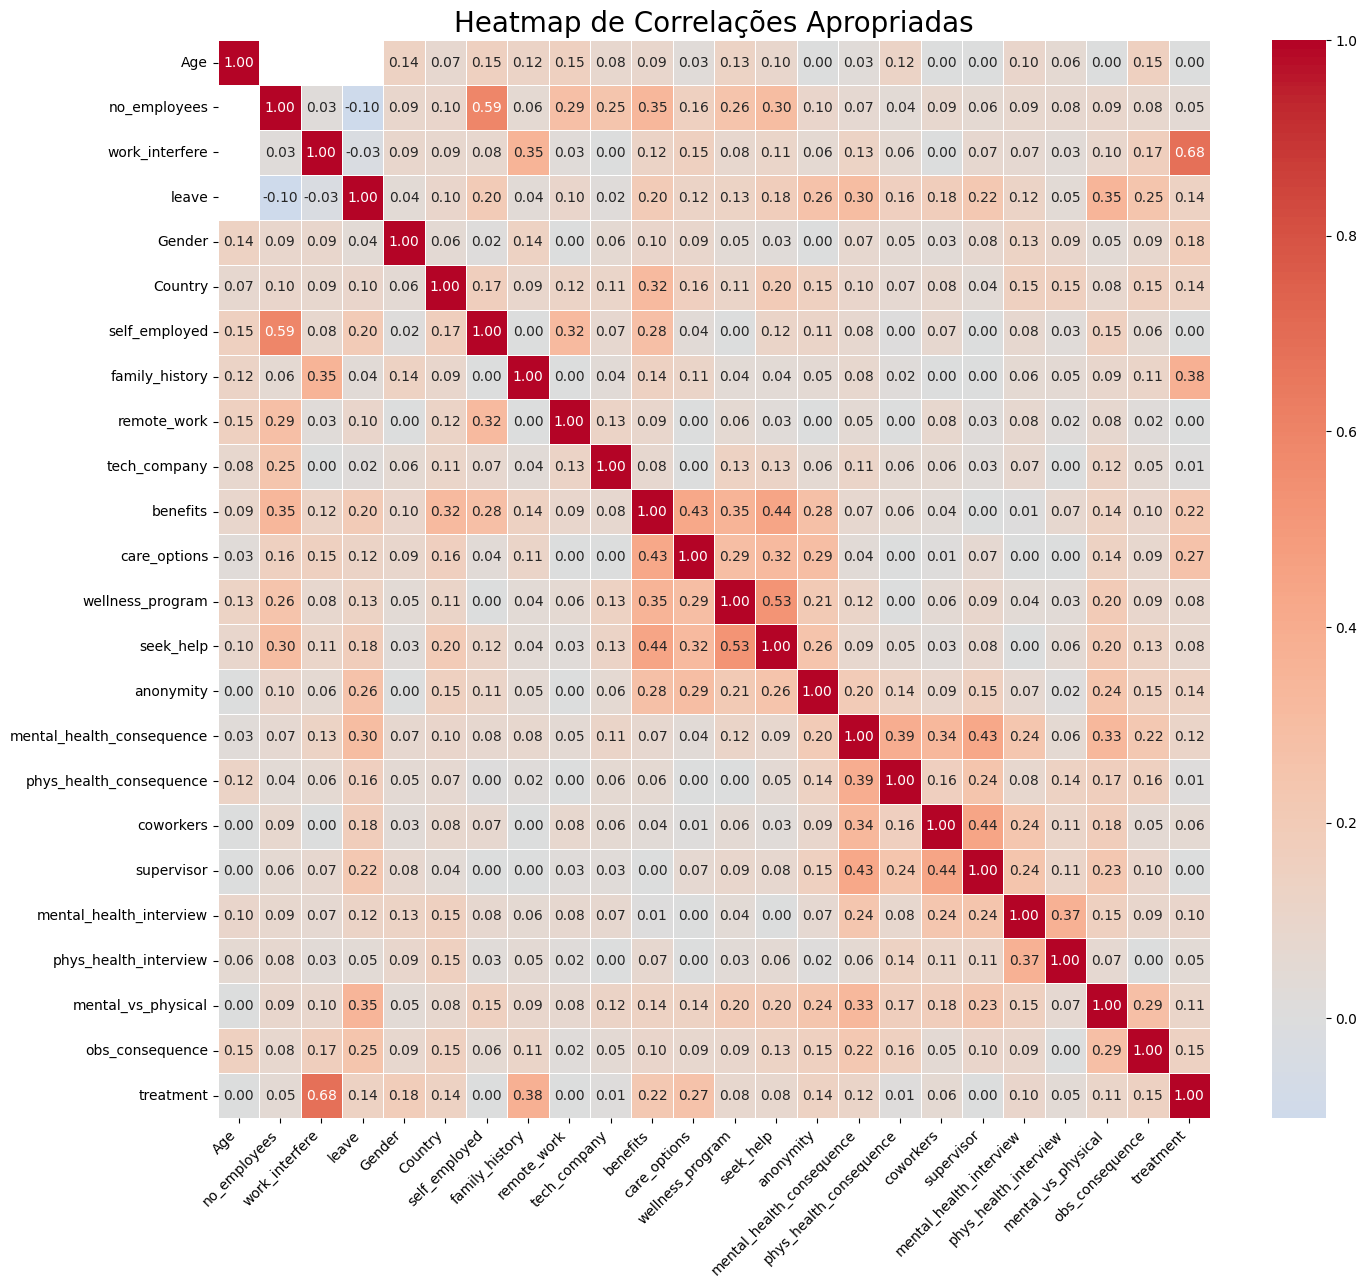

In [401]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Função para calcular o Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Variáveis categóricas, ordinais e contínuas
continuous_vars = ['Age']
ordinal_vars = ['no_employees', 'work_interfere', 'leave']
categorical_vars = ['Gender', "Country", "self_employed", "family_history", "remote_work", "tech_company",
                    "benefits", "care_options", "wellness_program", "seek_help", "anonymity", "mental_health_consequence",
                    "phys_health_consequence", "coworkers", "supervisor", "mental_health_interview", "phys_health_interview",
                    "mental_vs_physical", "obs_consequence", 'treatment']

# Concatenando todas as variáveis
all_vars = continuous_vars + ordinal_vars + categorical_vars

# Inicializando a matriz de correlação
corr_matrix = pd.DataFrame(np.nan, index=all_vars, columns=all_vars)

# Calculando as correlações
for var1 in all_vars:
    for var2 in all_vars:
        if var1 == var2:
            corr_matrix.loc[var1, var2] = 1.0
        elif (var1 in continuous_vars) and (var2 in continuous_vars):
            corr, _ = stats.pearsonr(df_cleaned[var1], df_cleaned[var2])
            corr_matrix.loc[var1, var2] = corr
        elif (var1 in ordinal_vars) and (var2 in ordinal_vars):
            corr, _ = stats.spearmanr(df_cleaned[var1], df_cleaned[var2])
            corr_matrix.loc[var1, var2] = corr
        elif (var1 in categorical_vars) and (var2 in categorical_vars):
            corr = cramers_v(df_cleaned[var1], df_cleaned[var2])
            corr_matrix.loc[var1, var2] = corr
        elif (var1 in continuous_vars and var2 in categorical_vars) or (var1 in categorical_vars and var2 in continuous_vars):
            corr = cramers_v(df_cleaned[var1], df_cleaned[var2])
            corr_matrix.loc[var1, var2] = corr
        elif (var1 in ordinal_vars and var2 in categorical_vars) or (var1 in categorical_vars and var2 in ordinal_vars):
            corr = cramers_v(df_cleaned[var1], df_cleaned[var2])
            corr_matrix.loc[var1, var2] = corr
        else:
            # Tipos incompatíveis
            corr_matrix.loc[var1, var2] = np.nan

# Criando o heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('Heatmap de Correlações Apropriadas', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [402]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Gender', "Country", "self_employed", "family_history", "remote_work", "tech_company",
                                                 "benefits", "care_options", "wellness_program", "seek_help", "anonymity", "mental_health_consequence",
                                                 "phys_health_consequence", "coworkers",	"supervisor",	"mental_health_interview",	"phys_health_interview",
                                                 "mental_vs_physical",	"obs_consequence"], drop_first=True)


In [403]:
df_encoded.head(2)

,Age,treatment,work_interfere,no_employees,leave,Gender_m,Gender_other,Country_Belgium,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Ireland,Country_Israel,Country_Italy,Country_Netherlands,Country_New Zealand,Country_Other,Country_Poland,Country_South Africa,Country_Sweden,Country_Switzerland,Country_United Kingdom,Country_United States,self_employed_Yes,family_history_Yes,remote_work_Yes,tech_company_Yes,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
18,46,No,Sometimes,1-5,Very easy,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,False,False,True,False,False,False,True,True,False,True,False,False,True,False,True,True,False,False,True,False,True,True
19,36,No,Unknown,6-25,Somewhat easy,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,True,True,False,False,True,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False


Aplicando Ordinal Encoding nas variáveis qualitativas ordinais;

In [404]:

no_employees_map = {
    '1-5': 0,
    '6-25': 1,
    '26-100': 2,
    '100-500': 3,
    '500-1000': 4,
    'More than 1000': 5
}
df_encoded['no_employees'] = df_encoded['no_employees'].map(no_employees_map)

work_interfere_map = {
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4,
    'Unknown': 0
}
df_encoded['work_interfere'] = df_encoded['work_interfere'].map(work_interfere_map)

leave_map = {
    'Very easy': 4,
    'Somewhat easy': 3,
    'Somewhat difficult': 2,
    'Very difficult': 1,
    "Don't know": 0
}
df_encoded['leave'] = df_encoded['leave'].map(leave_map)

treatment_map = {
    "No" : 0,
    "Yes" : 1
}
df_encoded['treatment'] = df_encoded['treatment'].map(treatment_map)




In [405]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Criar novo X apenas com variáveis relevantes
X = df_encoded.drop(columns=['treatment'])
y = df_encoded['treatment']

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Verificando as dimensões
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(988, 53) (248, 53) (988,) (248,)


In [406]:
y_train.value_counts()

,count
treatment,
1,501
0,487


In [407]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Converte todas as colunas booleanas para inteiros (0 ou 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Adiciona um intercepto
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Inicializando o modelo de Regressão Logística
model = sm.Logit(y_train, X_train_const)

# Treinando
result = model.fit_regularized(method='l1', alpha=0.1)

# previsões no conjunto de teste
y_pred_prob = result.predict(X_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Classificando com limiar de 0.5

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# E ainda pode ver o resumo estatístico completo:
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.35631862597574215
            Iterations: 458
            Function evaluations: 460
            Gradient evaluations: 458
Acurácia: 0.8064516129032258

Matriz de Confusão:
 [[ 95  30]
 [ 18 105]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       125
           1       0.78      0.85      0.81       123

    accuracy                           0.81       248
   macro avg       0.81      0.81      0.81       248
weighted avg       0.81      0.81      0.81       248

                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                  988
Model:                          Logit   Df Residuals:                      952
Method:                           MLE   Df Model:                           35
Date:                Mon, 28 Apr 2025  

In [408]:
# Lista de colunas irrelevantes
colunas_remover = [
    'Age', 'no_employees', 'leave', 'Gender_other', 'Country_Belgium',
    'Country_Brazil', 'Country_Canada', 'Country_France', 'Country_Germany',
    'Country_India', 'Country_Ireland', 'Country_Israel', 'Country_Italy',
    'Country_Netherlands', 'Country_New Zealand', 'Country_Other',
    'Country_Poland', 'Country_South Africa', 'Country_Sweden',
    'Country_Switzerland', 'Country_United Kingdom', 'Country_United States',
    'remote_work_Yes', 'tech_company_Yes', 'benefits_No', 'care_options_Not sure',
    'wellness_program_No', 'wellness_program_Yes',
    'seek_help_Yes', 'anonymity_No', 'mental_health_consequence_No',
    'mental_health_consequence_Yes', 'phys_health_consequence_No',
    'phys_health_consequence_Yes', 'mental_health_interview_No',
    'mental_health_interview_Yes', 'phys_health_interview_No',
    'phys_health_interview_Yes', 'mental_vs_physical_No',
    'mental_vs_physical_Yes', 'obs_consequence_Yes', "anonymity_Yes",
    'supervisor_Yes', 'self_employed_Yes', 'seek_help_No', 'coworkers_Some of them',
    'supervisor_Some of them'

]


# Criar novo X apenas com variáveis relevantes
X = df_encoded.drop(columns=['treatment'] + colunas_remover)
y = df_encoded['treatment']

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Verificando as dimensões
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(988, 6) (248, 6) (988,) (248,)


In [409]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Converte todas as colunas booleanas para inteiros (0 ou 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Adiciona um intercepto
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Inicializando o modelo de Regressão Logística
model = sm.Logit(y_train, X_train_const)

# Treinando
result = model.fit()

# previsões no conjunto de teste
y_pred_prob = result.predict(X_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Classificando com limiar de 0.5

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# E ainda pode ver o resumo estatístico completo:
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.381539
         Iterations 7
Acurácia: 0.8225806451612904

Matriz de Confusão:
 [[ 90  35]
 [  9 114]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80       125
           1       0.77      0.93      0.84       123

    accuracy                           0.82       248
   macro avg       0.84      0.82      0.82       248
weighted avg       0.84      0.82      0.82       248

                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                  988
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                  0.4495
Time:                        13:38:48   Log-Likelihood:                -

Pelo teste de hipótese (que verifica se o coeficiente de cada variável é significativamente diferente de zero), é possível verificar que essas são as variáveis que melhor explicam a variável alvo (treatment); Também é possível observar o aumento da acurácia, em comparação com o modelo que incluia todas as variáveis.